In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

In [22]:
# get data
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

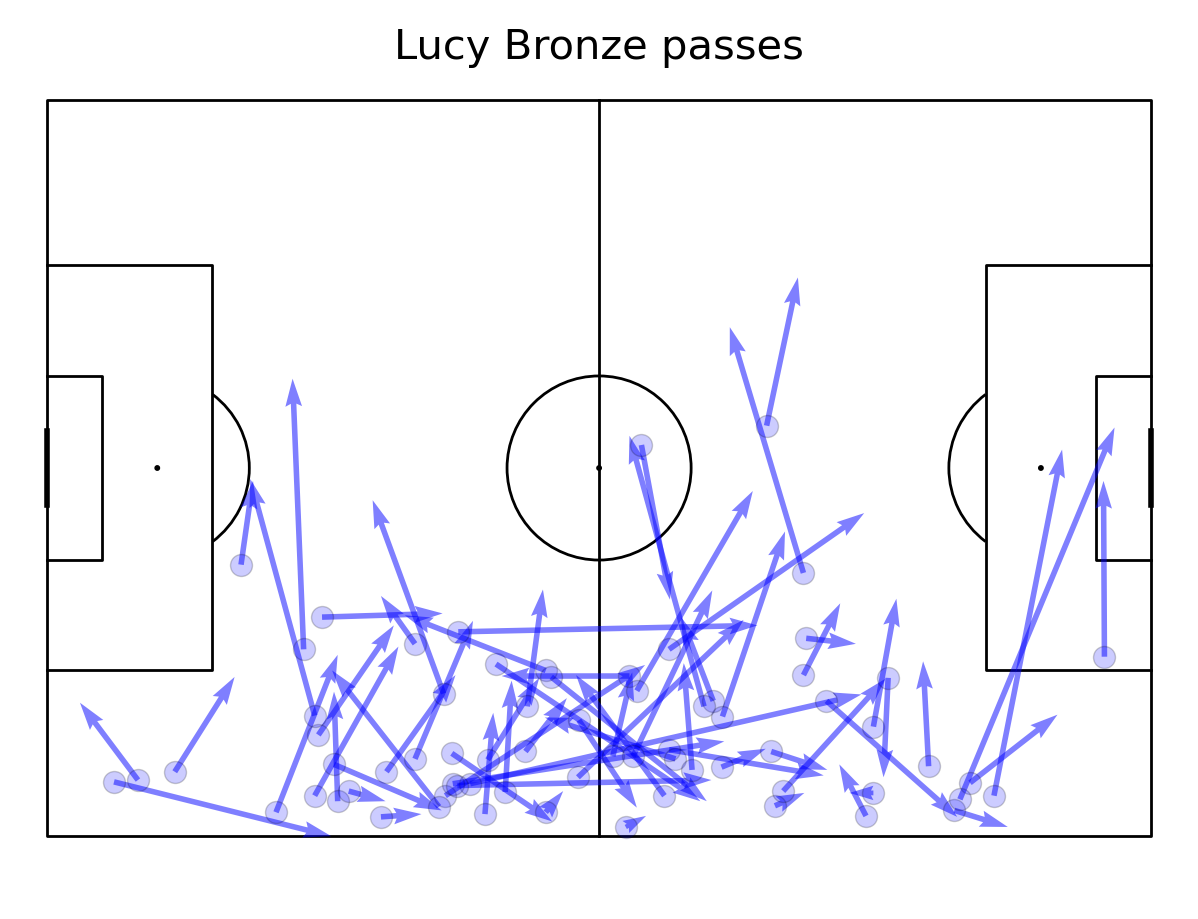

In [23]:
# plot passes of Lucy Bronze
passes_lb = passes.loc[passes["player_name"] == "Lucy Bronze", ["x", "y", "end_x", "end_y"]]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

pitch.arrows(passes_lb["x"], passes_lb["y"], passes_lb["end_x"], passes_lb["end_y"], ax=ax["pitch"], color="blue", alpha=0.5)
pitch.scatter(passes_lb["x"], passes_lb["y"], alpha=0.2, s=250, color="blue", ax=ax["pitch"], edgecolors="black")
fig.suptitle(f"Lucy Bronze passes", fontsize=30)
plt.show()

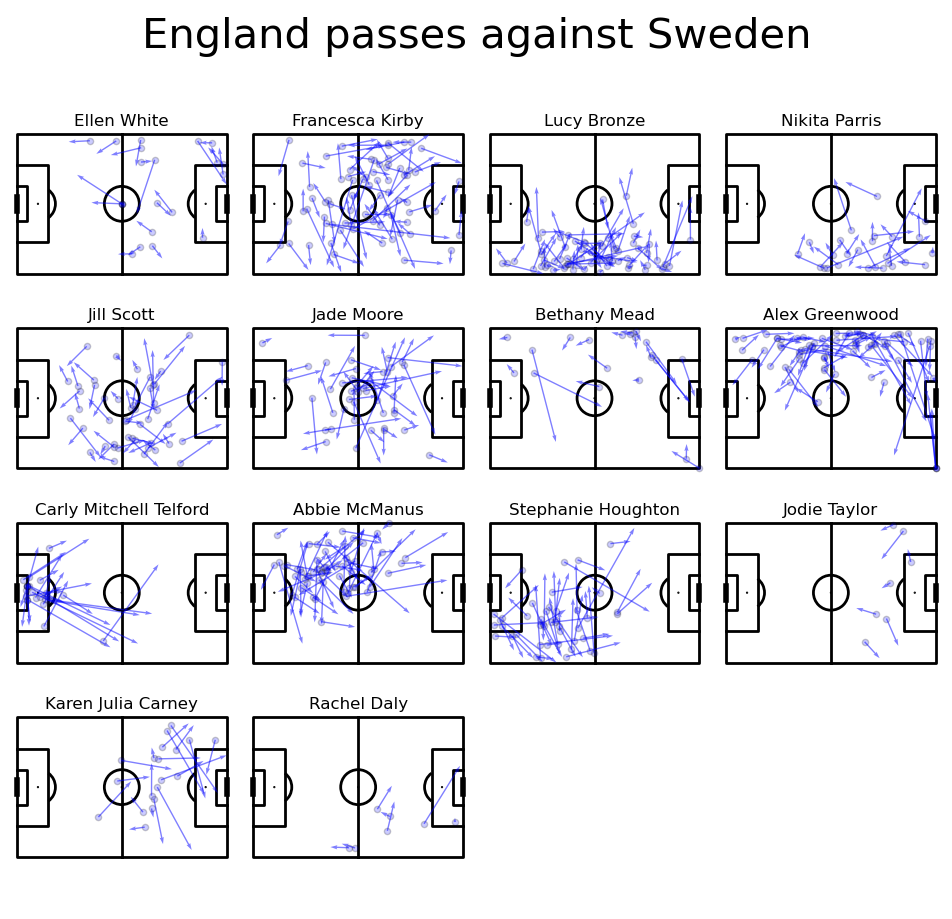

In [36]:
# PLOT PASS MAP FOR ALL PLAYERS
# get England passes
mask_england = (df.type_name == 'Pass') & (df.team_name == "England Women's") & (df.sub_type_name != "Throw-in")
passes_england = df.loc[mask_england, ["x", "y", "end_x", "end_y", "player_name"]]

# get list of unique player names
player_names = passes_england["player_name"].unique()

# setup pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

# loop over player names and plot passes
for name, ax in zip(player_names, axs['pitch'].flat[:len(player_names)]):
    # put player name over plot
    ax.text(60, -12, name, ha='center', va='top', fontsize=12)

    # get passes for player
    passes_player = passes_england.loc[passes_england["player_name"] == name]

    # scatter passes
    pitch.scatter(passes_player["x"], passes_player["y"], alpha=0.2, s=20, color="blue", ax=ax, edgecolors="black")

    # plot arrows
    pitch.arrows(passes_player["x"], passes_player["y"], passes_player["end_x"], passes_player["end_y"], ax=ax, color="blue", alpha=0.5, width=1)

# remove empty pitches
for ax in axs['pitch'].flat[len(player_names):]:
    ax.remove()

# add title
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()
